#1. Display Data Types of Each Column

In [2]:
import pandas as pd

# Load the dataset
file_path = '/content/kc_house_data.csv'
df = pd.read_csv(file_path)

# Display the first few rows and data types
df_head = df.head()
df_dtypes = df.dtypes

df_head, df_dtypes

(           id             date     price  bedrooms  bathrooms  sqft_living  \
 0  7129300520  20141013T000000  221900.0         3       1.00         1180   
 1  6414100192  20141209T000000  538000.0         3       2.25         2570   
 2  5631500400  20150225T000000  180000.0         2       1.00          770   
 3  2487200875  20141209T000000  604000.0         4       3.00         1960   
 4  1954400510  20150218T000000  510000.0         3       2.00         1680   
 
    sqft_lot  floors  waterfront  view  ...  grade  sqft_above  sqft_basement  \
 0      5650     1.0           0     0  ...      7        1180              0   
 1      7242     2.0           0     0  ...      7        2170            400   
 2     10000     1.0           0     0  ...      6         770              0   
 3      5000     1.0           0     0  ...      7        1050            910   
 4      8080     1.0           0     0  ...      8        1680              0   
 
    yr_built  yr_renovated  zipcode 

#2. Drop Unnecessary Columns and Display Statistical Summary

In [3]:
# Drop 'id' column and 'Unnamed: 0' (if it exists), then display the statistical summary
df_cleaned = df.drop(['id'], axis=1)  # Assuming 'Unnamed: 0' doesn't exist
df_cleaned.describe()


,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.161300e+04,21613.000000,21613.000000,21613.000000,2.161300e+04,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
mean,5.400881e+05,3.370842,2.114757,2079.899736,1.510697e+04,1.494309,0.007542,0.234303,3.409430,7.656873,1788.390691,291.509045,1971.005136,84.402258,98077.939805,47.560053,-122.213896,1986.552492,12768.455652
std,3.671272e+05,0.930062,0.770163,918.440897,4.142051e+04,0.539989,0.086517,0.766318,0.650743,1.175459,828.090978,442.575043,29.373411,401.679240,53.505026,0.138564,0.140828,685.391304,27304.179631
min,7.500000e+04,0.000000,0.000000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,1.000000,290.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,3.219500e+05,3.000000,1.750000,1427.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.471000,-122.328000,1490.000000,5100.000000
50%,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.230000,1840.000000,7620.000000
75%,6.450000e+05,4.000000,2.500000,2550.000000,1.068800e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,560.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


#3. Count Unique Floor Values and Convert to DataFrame

In [4]:
# Count the number of houses with unique floor values and convert to DataFrame
floors_count = df_cleaned['floors'].value_counts().to_frame()
floors_count


,count
floors,
1.0,10680
2.0,8241
1.5,1910
3.0,613
2.5,161
3.5,8


#4. Create a Boxplot to Analyze Price and Waterfront View

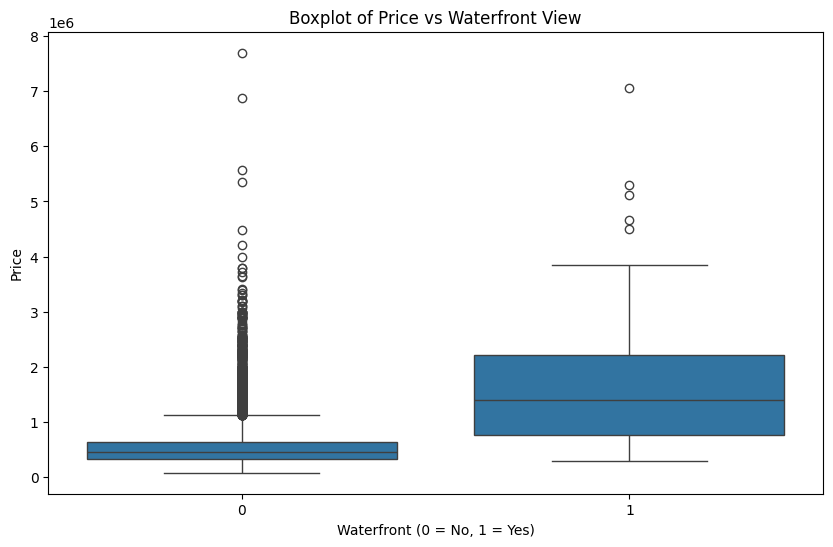

In [5]:
import seaborn as sns
import matplotlib.pyplot as plt

# Create a boxplot to analyze price outliers based on waterfront view
plt.figure(figsize=(10, 6))
sns.boxplot(x='waterfront', y='price', data=df_cleaned)
plt.title('Boxplot of Price vs Waterfront View')
plt.xlabel('Waterfront (0 = No, 1 = Yes)')
plt.ylabel('Price')
plt.show()

#5. Create a Regression Plot for Sqft Above vs Price


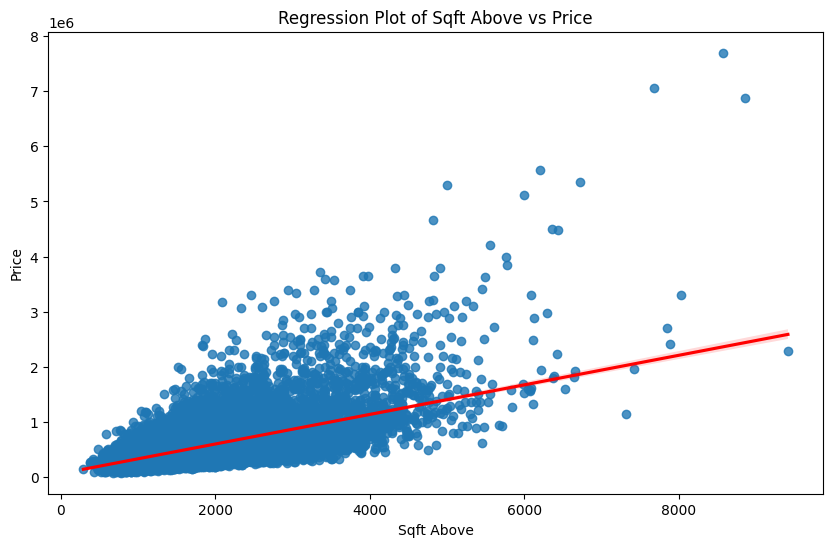

In [6]:
# Create regression plot to analyze correlation between sqft_above and price
plt.figure(figsize=(10, 6))
sns.regplot(x='sqft_above', y='price', data=df_cleaned, line_kws={"color": "red"})
plt.title('Regression Plot of Sqft Above vs Price')
plt.xlabel('Sqft Above')
plt.ylabel('Price')
plt.show()

#6. Fit a Linear Regression Model for Price vs Sqft Living and Calculate R²

In [7]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

# Prepare data for regression
X = df_cleaned[['sqft_living']]
y = df_cleaned['price']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Fit the linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Predict and calculate R² score
y_pred = model.predict(X_test)
r2 = r2_score(y_test, y_pred)
r2

0.48388319278201475

#7. Fit a Linear Regression Model for Price Using Multiple Features and Calculate R²

In [8]:
# Features for linear regression
features = ['floors', 'waterfront', 'lat', 'bedrooms', 'sqft_basement', 'view', 'bathrooms',
            'sqft_living15', 'sqft_above', 'grade', 'sqft_living']

X = df_cleaned[features]
y = df_cleaned['price']

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Fit linear regression
model = LinearRegression()
model.fit(X_train, y_train)

# Predict and calculate R²
y_pred = model.predict(X_test)
r2_multiple = r2_score(y_test, y_pred)
r2_multiple

0.6544974911601662

#8. Create a Pipeline for Polynomial Regression and Calculate R²

In [9]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

# Create a pipeline for polynomial regression
pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('poly', PolynomialFeatures(degree=2)),
    ('model', LinearRegression())
])

# Fit the pipeline
pipeline.fit(X_train, y_train)

# Predict and calculate R²
y_pred_poly = pipeline.predict(X_test)
r2_poly = r2_score(y_test, y_pred_poly)
r2_poly

0.7118256769046134

#9. Fit a Ridge Regression Model with Regularization and Calculate R²

In [10]:
from sklearn.linear_model import Ridge

# Fit Ridge regression
ridge_model = Ridge(alpha=0.1)
ridge_model.fit(X_train, y_train)

# Predict and calculate R²
y_pred_ridge = ridge_model.predict(X_test)
r2_ridge = r2_score(y_test, y_pred_ridge)
r2_ridge

0.6544903700493674

#10. Perform Second-Order Polynomial Regression with Ridge Regularization and Calculate R²

In [11]:
# Create a pipeline with polynomial features and ridge regression
ridge_pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('poly', PolynomialFeatures(degree=2)),
    ('ridge', Ridge(alpha=0.1))
])

# Fit the ridge pipeline
ridge_pipeline.fit(X_train, y_train)

# Predict and calculate R²
y_pred_ridge_poly = ridge_pipeline.predict(X_test)
r2_ridge_poly = r2_score(y_test, y_pred_ridge_poly)
r2_ridge_poly

0.7119769122680635